<a href="https://colab.research.google.com/github/Kashishsarkar/project_1/blob/main/AD_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!git clone https://github.com/RajaPiyush/Airlines_ticket_Prediction

Cloning into 'Airlines_ticket_Prediction'...
remote: Enumerating objects: 10, done.
remote: Counting objects: 100% (10/10), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 10 (delta 0), reused 2 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (10/10), 857.59 KiB | 7.66 MiB/s, done.


In [3]:
!conda env create -f Airlines_ticket_Prediction/environment.yml

/bin/bash: line 1: conda: command not found


In [4]:
!pip install pandas openpyxl

In [5]:
import pandas as pd
from google.colab import files
uploaded = files.upload()
df=pd.read_excel('Data_Train.xlsx')
df.head()
print(df.head())

Saving Data_Train.xlsx to Data_Train.xlsx
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [6]:

print("dataframe: ")
print(df.head())

dataframe: 
       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302  


In [7]:
total_nulls = df.isnull().sum()
print("total nulls in each column: \n")
print(total_nulls)

total nulls in each column: 

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64


In [8]:
print("summary statistics:")
print(df.describe()) #calculate all the statistics--> describe()

summary statistics:
              Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000


In [9]:
rows_before_drop = len(df)
df_cleaned = df.dropna()
rows_after_drop= len(df_cleaned)
print(f"rows before drop: {rows_before_drop}") #dynamic insertion
print(f"rows after drop: {rows_after_drop}")   #dynamic insertion using f and {}

rows before drop: 10683
rows after drop: 10682


In [10]:
ColumnName= df.Dep_Time
if 'ColumnName' in df.columns:
  df['ColumnName'] = df['ColumnName'].fillna(df['ColumnName'].mean())
  print("column filled with mean")
else:
  print("column not found")

column not found


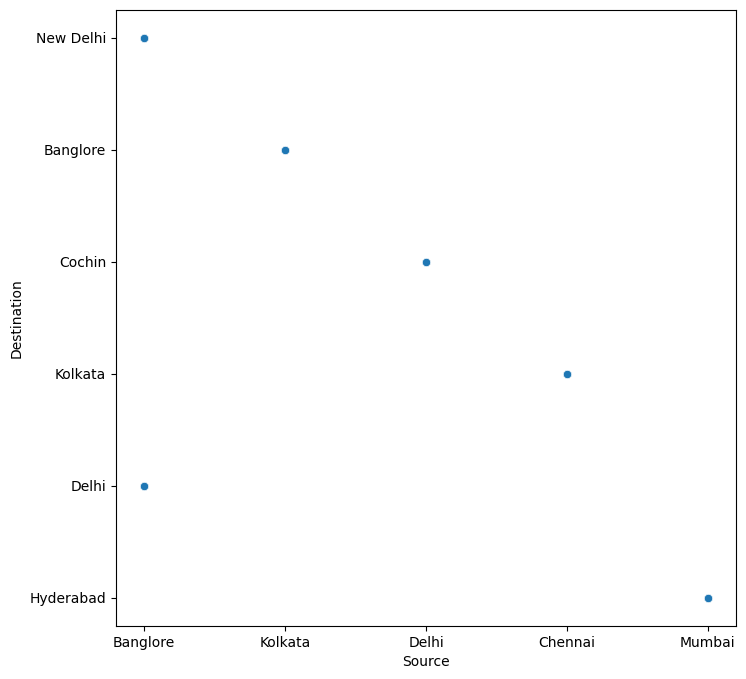

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
if {'Source', 'Destination'}.issubset(df.columns):
  plt.figure(figsize=(8,8))
  sns.scatterplot(x=df['Source'], y= df['Destination'])
  plt.xlabel('Source')
  plt.ylabel('Destination')
  plt.show()
else:
  print("columns not found")


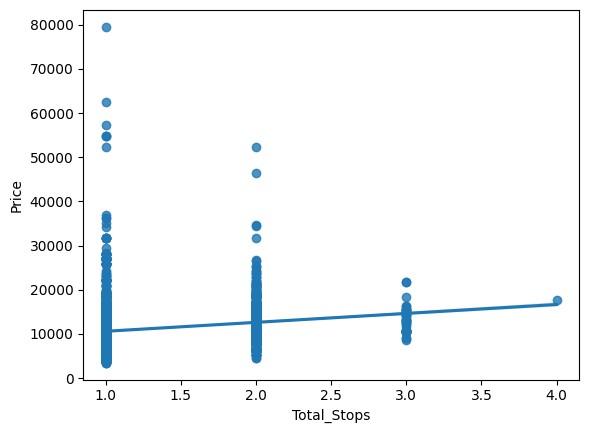

In [12]:
if 'Total_Stops' in df.columns:
    df['Total_Stops'] = df['Total_Stops'].str.extract(r'(\d+)').astype(float)
if{'Total_Stops','Price'}.issubset(df.columns):
  sns.regplot(x=df['Total_Stops'], y=df['Price'])
  plt.xlabel = 'Total_Stops'
  plt.ylabel ='Price'
  plt.show()
else:
  print("columns not found")

In [13]:
if 'Arrival_Time' in df.columns:
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'],errors = 'coerce')
  print("column converted to datetime")
  print(df['Arrival_Time'])
else:
  print("column not found")

column converted to datetime
0       2024-03-22 01:10:00
1       2024-12-13 13:15:00
2       2024-06-10 04:25:00
3       2024-12-13 23:30:00
4       2024-12-13 21:35:00
                ...        
10678   2024-12-13 22:25:00
10679   2024-12-13 23:20:00
10680   2024-12-13 11:20:00
10681   2024-12-13 14:10:00
10682   2024-12-13 19:15:00
Name: Arrival_Time, Length: 10683, dtype: datetime64[ns]


<ipython-input-13-c572732a78f0>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Arrival_Time'] = pd.to_datetime(df['Arrival_Time'],errors = 'coerce')


In [14]:
if 'Price' in df.columns:
  numerical_df = df.select_dtypes(include=['number'])
  grouped_data = numerical_df.groupby('Price').agg(['mean', 'sum','count'])
  print(grouped_data)
else:
  print("column not found")

      Total_Stops           
             mean  sum count
Price                       
1759          NaN  0.0     0
1840          NaN  0.0     0
1965          NaN  0.0     0
2017          NaN  0.0     0
2050          NaN  0.0     0
...           ...  ...   ...
52285         2.0  2.0     1
54826         1.0  3.0     3
57209         1.0  1.0     1
62427         1.0  1.0     1
79512         1.0  1.0     1

[1870 rows x 3 columns]


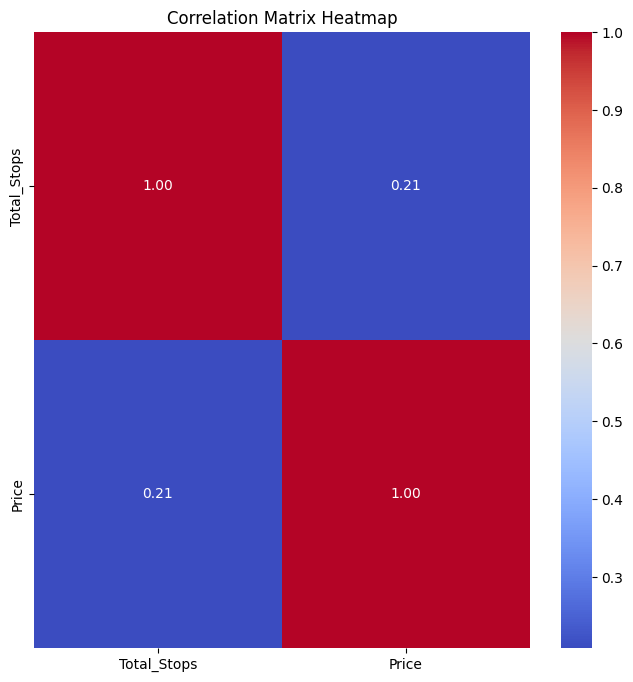

In [15]:
plt.figure(figsize=(8,8))
numerical_df = df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot= True, cmap = 'coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()
